**[MNIST Data Set](http://yann.lecun.com/exdb/mnist/) Utils**

In [1]:
import sys
import os
import gzip

In [2]:
import numpy as np

import struct

MNIST_IMAGE_MAGIC_NUMBER = 2051
MNIST_LABEL_MAGIC_NUMBER = 2049

import pil_utils

def read_int32(f):
    """Read int32 from binary file
    """
    buffer = f.read(4)
    return struct.unpack_from('>L', buffer)[0]

def load_image_file(img_file, as_float=False):
    """Load image file
    """

    # TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
    # [offset] [type]          [value]          [description] 
    # 0000     32 bit integer  0x00000803(2051) magic number 
    # 0004     32 bit integer  60000            number of images 
    # 0008     32 bit integer  28               number of rows 
    # 0012     32 bit integer  28               number of columns 
    # 0016     unsigned byte   ??               pixel 
    # 0017     unsigned byte   ??               pixel 
    # ........ 
    # xxxx     unsigned byte   ??               pixel
    # Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 
    # 255 means foreground (black).

    if img_file.endswith('.gz'):
        open_func = gzip.open
    else:
        open_func = open
    imgs = []
    with open_func(img_file, 'rb') as f:
        magic = read_int32(f)
        assert(magic == MNIST_IMAGE_MAGIC_NUMBER)
        num_images = read_int32(f)
        num_rows = read_int32(f)
        num_cols = read_int32(f)
        img_sz = num_rows * num_cols
        for i in range(num_images):
            buffer = f.read(img_sz)
            data = 255 - (np.frombuffer(buffer, dtype=np.uint8)).reshape(num_rows, num_cols)
            if as_float:
                data = (data/255).astype(pil_utils.IMG_FLOAT_TYPE)
            imgs.append(data)
    return imgs

def load_label_file(lbl_file):
    """Load label file
    """
    
    # TRAINING SET LABEL FILE (train-labels-idx1-ubyte):
    # [offset] [type]          [value]          [description] 
    # 0000     32 bit integer  0x00000801(2049) magic number (MSB first) 
    # 0004     32 bit integer  60000            number of items 
    # 0008     unsigned byte   ??               label 
    # 0009     unsigned byte   ??               label 
    # ........ 
    # xxxx     unsigned byte   ??               label
    # The labels values are 0 to 9.

    READ_CHUNK_SZ = 0x10000 # 64k, that is
    
    if lbl_file.endswith('.gz'):
        open_func = gzip.open
    else:
        open_func = open
    lbls = []
    with open_func(lbl_file, 'rb') as f:
        magic = read_int32(f)
        assert(magic == MNIST_LABEL_MAGIC_NUMBER)
        num_labels = read_int32(f)
        to_read = num_labels
        offset = 0
        while to_read:
            n = min(READ_CHUNK_SZ, to_read)
            buffer = f.read(n)
            lbls.extend(buffer)
            to_read -= n
            offset += n
    return lbls

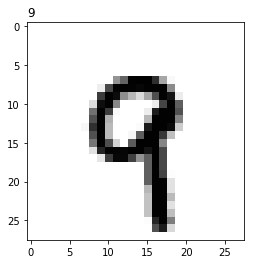

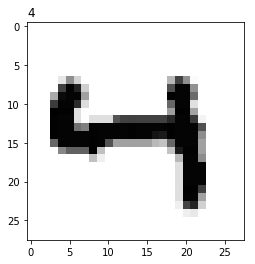

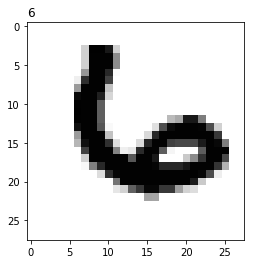

In [3]:
if __name__ == '__main__':
    imgs = load_image_file('data/mnist/t10k-images-idx3-ubyte.gz')
    labels = load_label_file('data/mnist/t10k-labels-idx1-ubyte.gz')
    
    for i in [113, 287, 937]:
        pil_utils.plot_image(imgs[i], title=labels[i])